# Unsupervised Lerning

## K- Means Clusturing

In [1]:
set.seed(2)

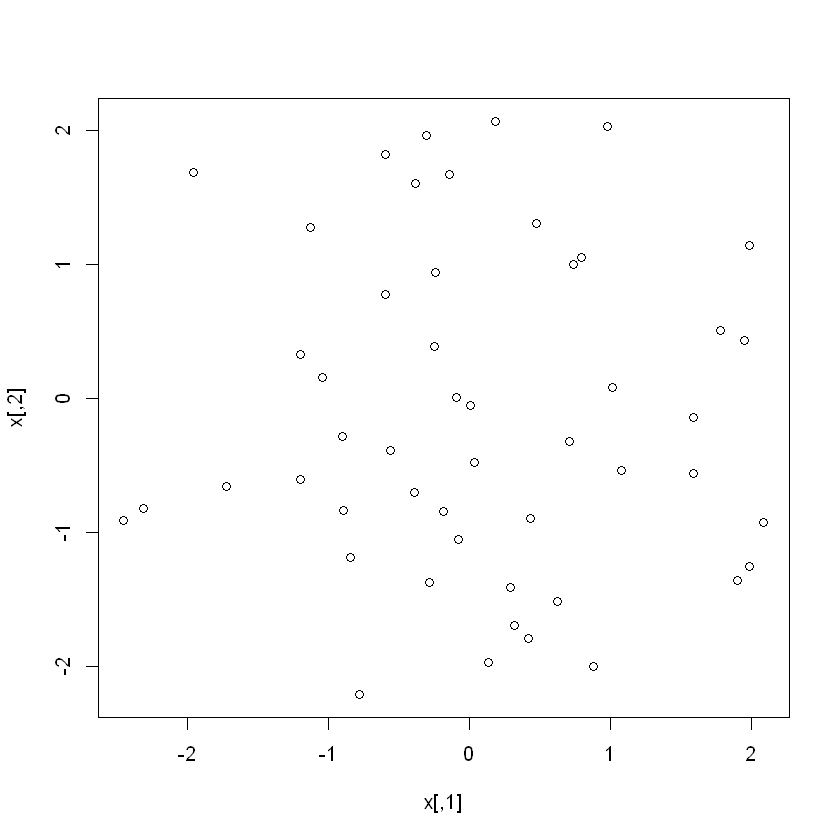

In [2]:
#z normal distribution roperties
# creating matrix of 50 observations first 25 obs. has mean shift relative to next 25 obs.
x=matrix(rnorm(50*2), ncol=2)
plot(x)

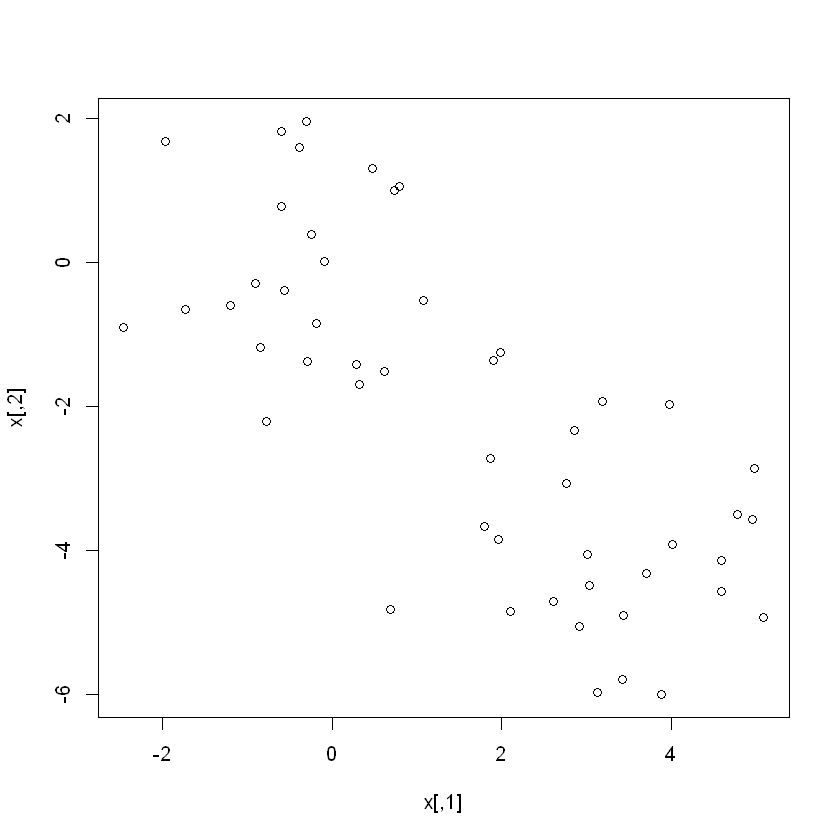

In [3]:
x[1:25,1]=x[1:25,1]+3
x[1:25,2]=x[1:25,2]-4
plot(x)

In [4]:
# performing K-means with k=2
km.out = kmeans(x, centers = 2, nstart = 20) #nstart for multiple initial random points
km.out$cluster # cluster assignment

[1] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1
[39] 1 1 1 1 1 1 1 1 1 1 1 1

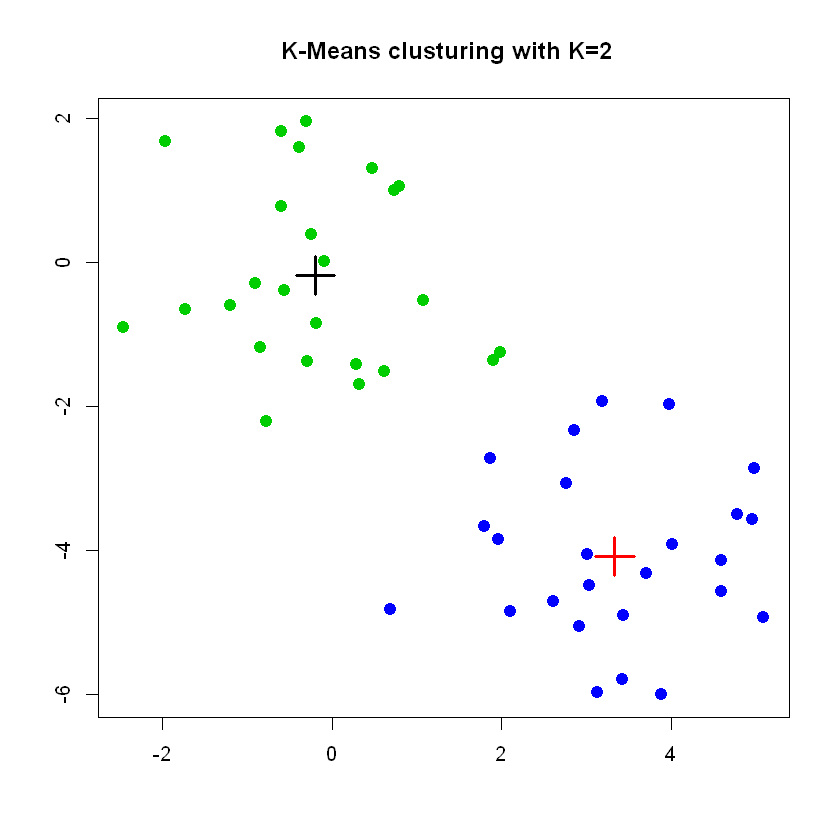

In [5]:
plot(x, col=(km.out$cluster+2), main = " K-Means clusturing with K=2", xlab="", ylab="", pch=20, cex=2)
points(km.out$centers, col=1:2, pch=3, cex=3, lwd=3)

In [6]:
# total within-cluster sum of square
km.out$tot.withinss

# total between cluster sum of square
km.out$betweenss

# total sum of square
km.out$totss

# percent withinness
km.out$tot.withinss/km.out$totss

[1] 128.6066

[1] 345.0113

[1] 473.6179

[1] 0.2715409

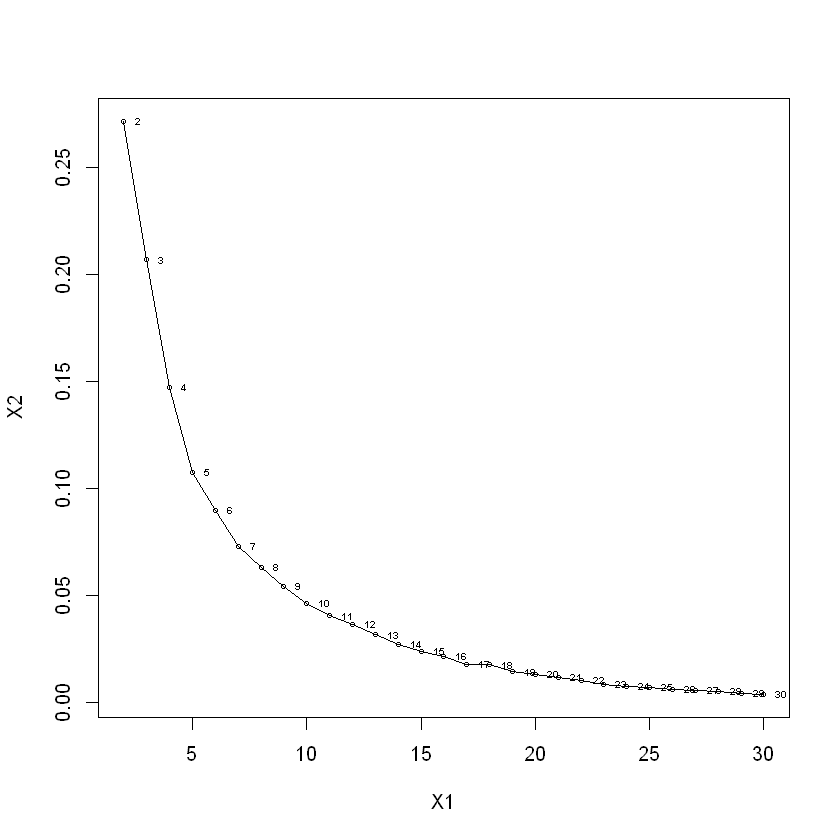

In [12]:
# percent withinness for various K

no.of.points<-30
result <- data.frame(matrix(nrow = no.of.points, ncol = 2))

for (i in 2:no.of.points)
{
    km.out = kmeans(x, centers = i, nstart = 20) #nstart for multiple initial random points
    result[i, 1] <- i
    result[i, 2] <- km.out$tot.withinss/km.out$totss
}

plot(result, type = "o", cex=0.5)
text(result, cex=0.5, font=2, pos = 4)

## Hierarchical Clusturing

In [13]:
#dist(x) # computes 50x50 inter-observation euclidinan distance matrix

In [14]:
hc.complete = hclust(dist(x), method = "complete")
hc.average = hclust(dist(x), method = "average")
hc.single = hclust(dist(x), method = "single")

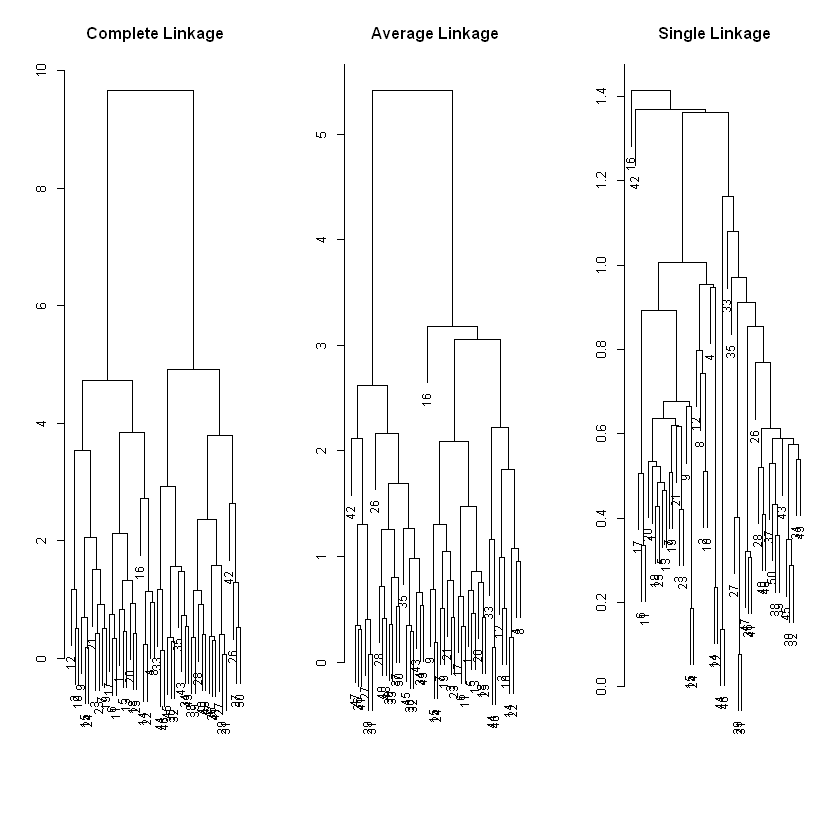

In [15]:
par(mfrow = c(1,3))
plot(hc.complete, main="Complete Linkage", xlab = "", ylab = "", sub = "", cex=.9)
plot(hc.average, main="Average Linkage", xlab = "", ylab = "", sub = "", cex=.9)
plot(hc.single, main="Single Linkage", xlab = "", ylab = "", sub = "", cex=.9)

In [17]:
cutree(hc.complete, k=2)
cutree(hc.average, k=2)
cutree(hc.single, k=2)
cutree(hc.single, k=3)
cutree(hc.single, h=1.2) # rarely used on height

[1] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2
[39] 2 2 2 2 2 2 2 2 2 2 2 2

[1] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 1 2 2 2 2 2
[39] 2 2 2 2 2 1 2 1 2 2 2 2

[1] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
[39] 1 1 1 1 1 1 1 1 1 1 1 1

[1] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
[39] 1 1 1 3 1 1 1 1 1 1 1 1

[1] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 3 3 3 3 3 3 3 3 3 3 3 3 3
[39] 3 3 3 4 3 3 3 3 3 3 3 3

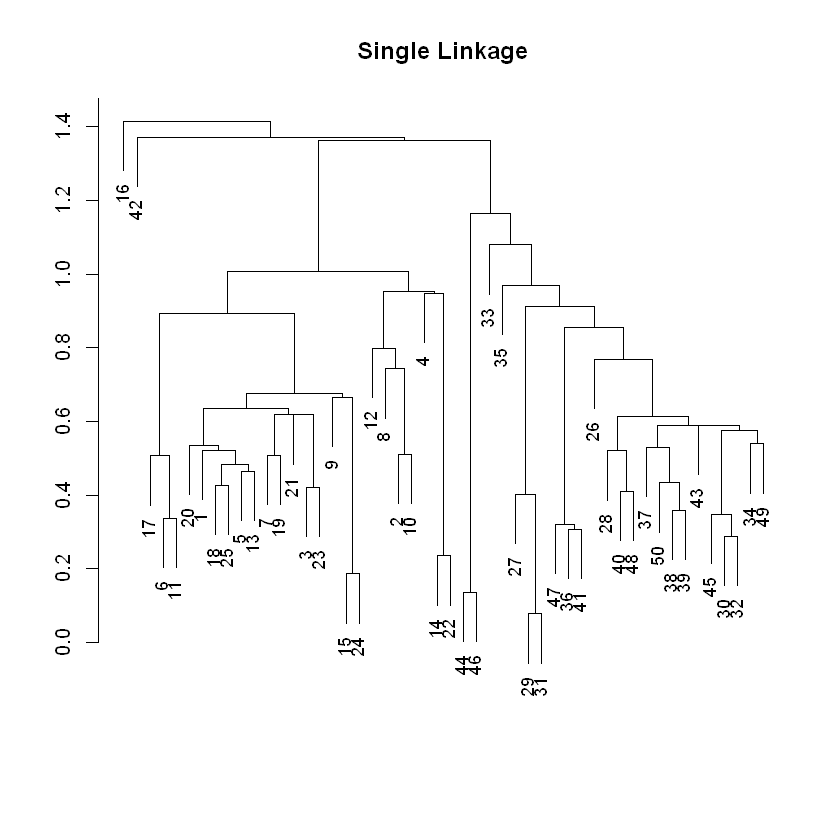

In [18]:
par(mfrow = c(1,1))
plot(hc.single, main="Single Linkage", xlab = "", ylab = "", sub = "", cex=.9)

In [19]:
cutree(hc.single, k=4)

[1] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 3 3 3 3 3 3 3 3 3 3 3 3 3
[39] 3 3 3 4 3 3 3 3 3 3 3 3

## DBSCAN

In [20]:
library(fpc)

In [21]:
data(iris)

In [22]:
iris = data.frame(iris)
head(iris)
table(iris$Species)
newiris <- iris[-5] # remove tags

Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
5.1,3.5,1.4,0.2,setosa
4.9,3.0,1.4,0.2,setosa
4.7,3.2,1.3,0.2,setosa
4.6,3.1,1.5,0.2,setosa
5.0,3.6,1.4,0.2,setosa
5.4,3.9,1.7,0.4,setosa



    setosa versicolor  virginica 
        50         50         50 

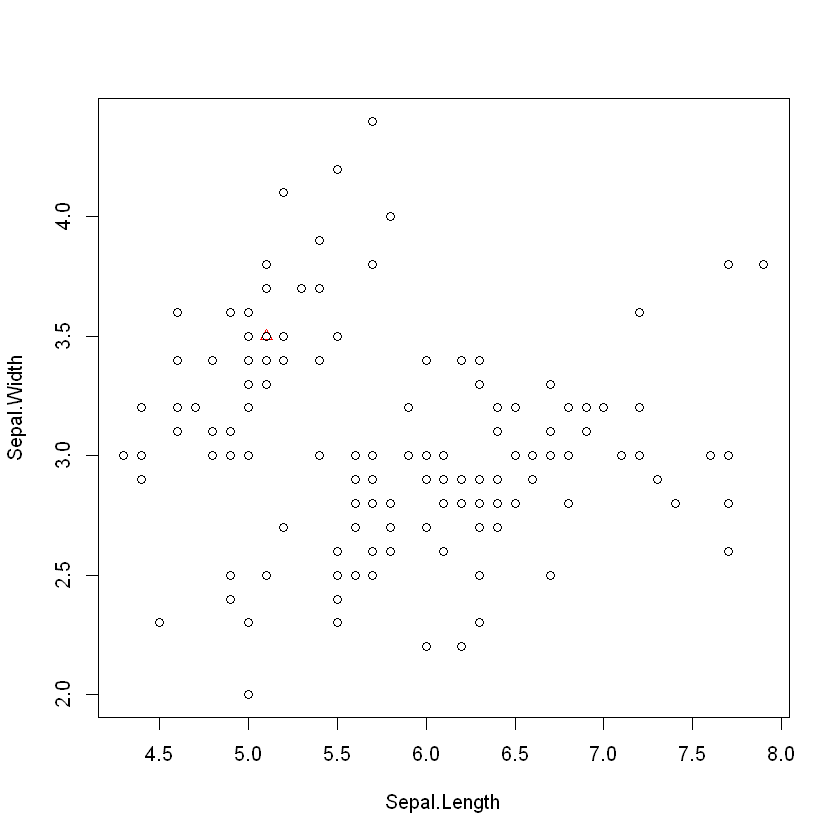

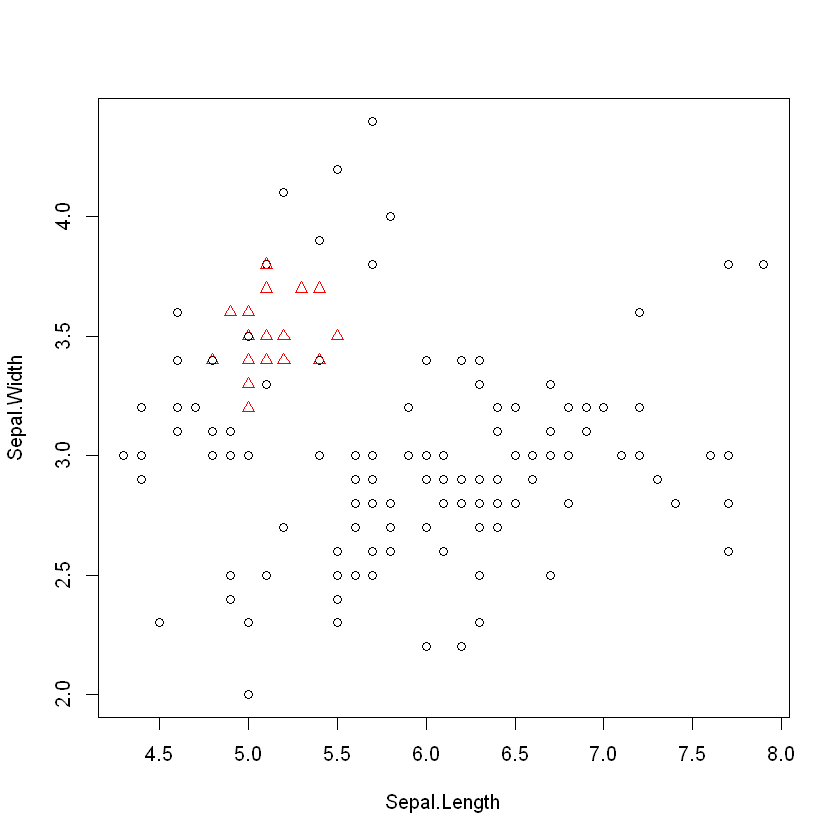

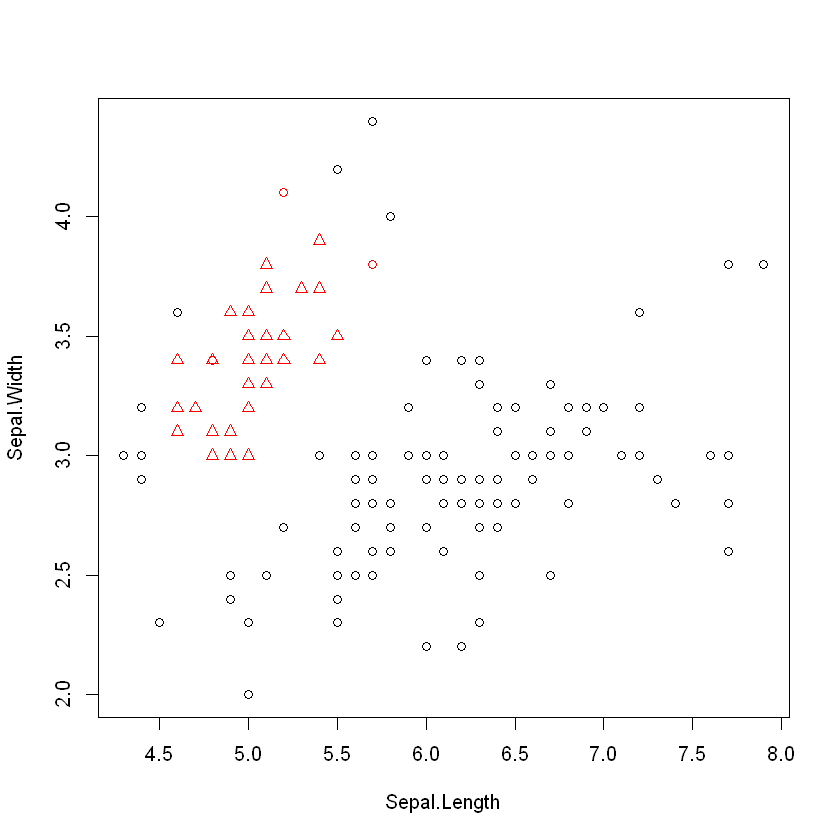

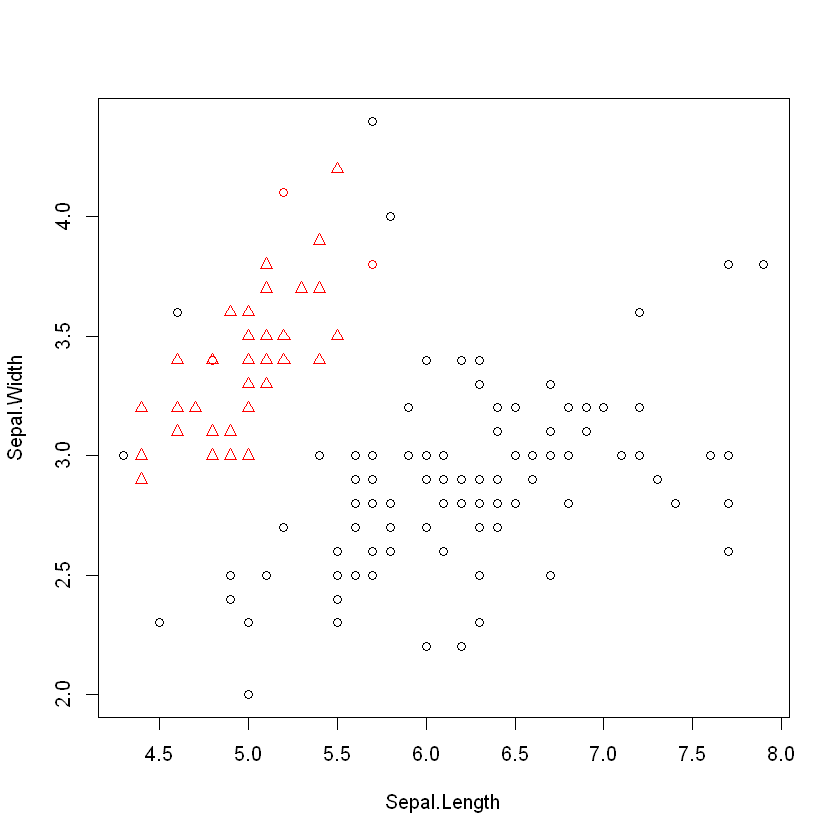

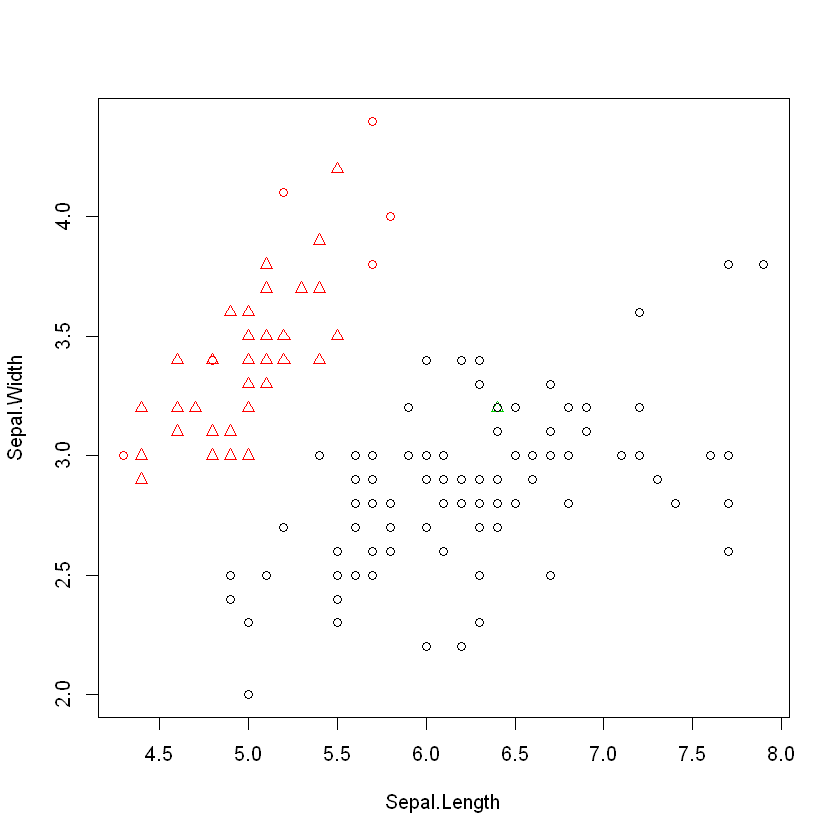

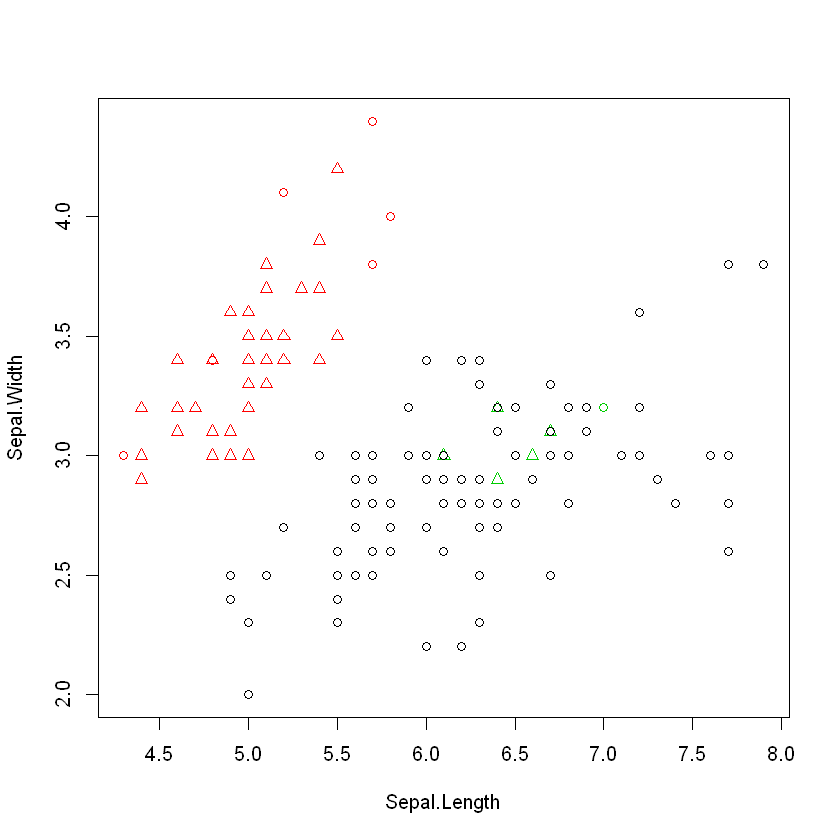

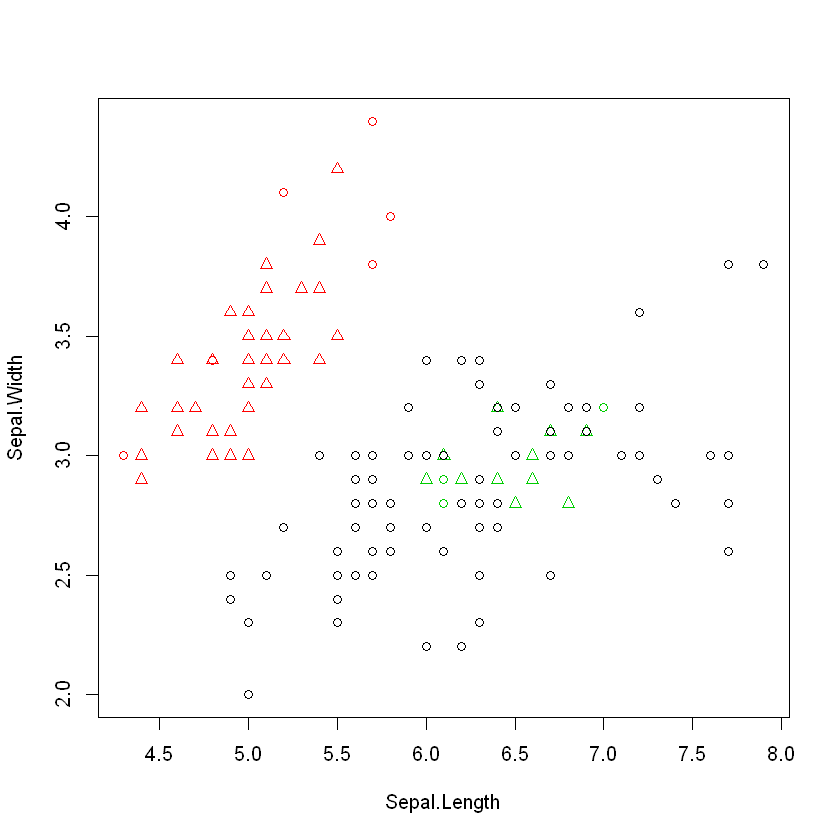

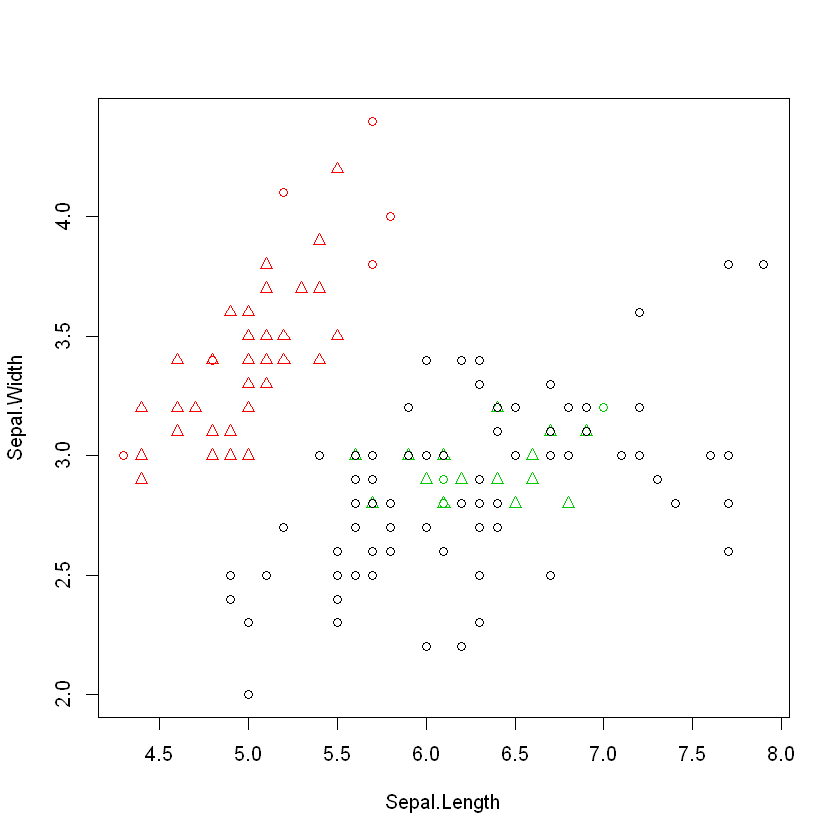

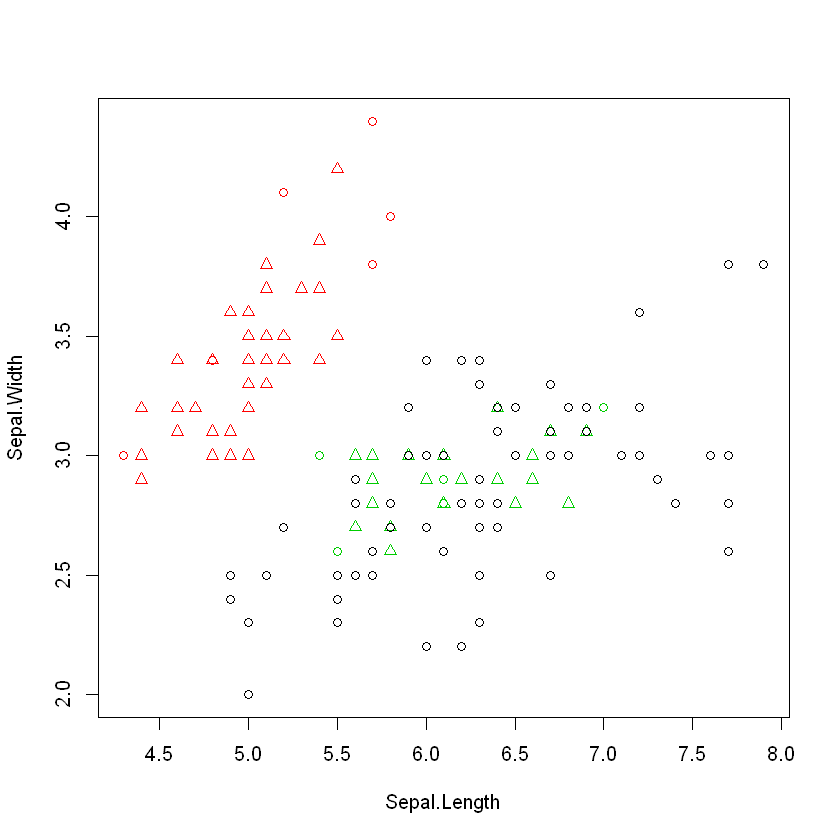

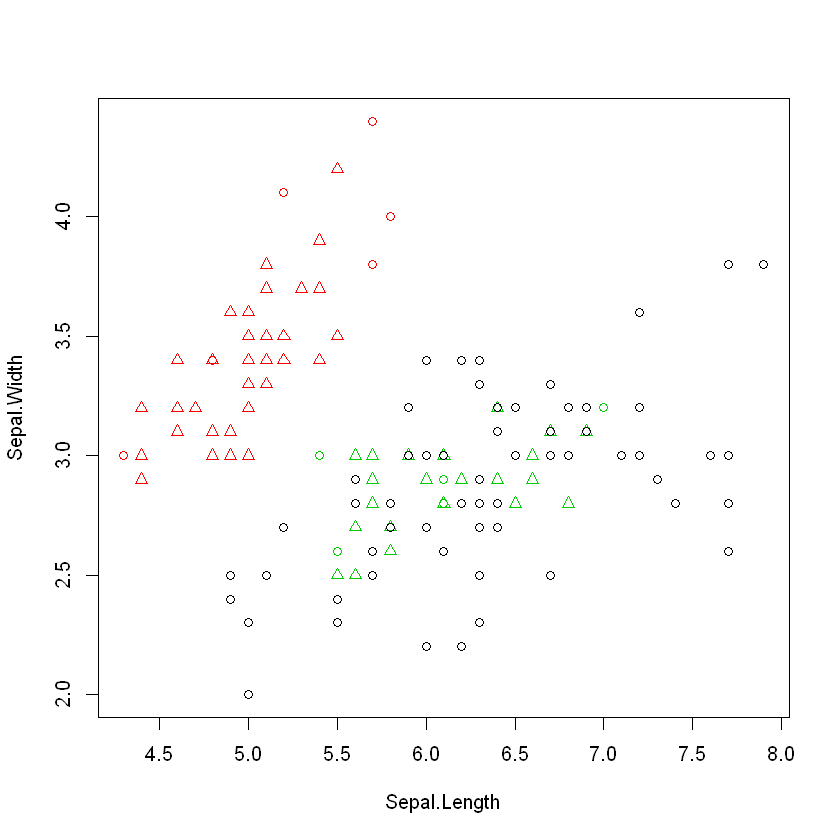

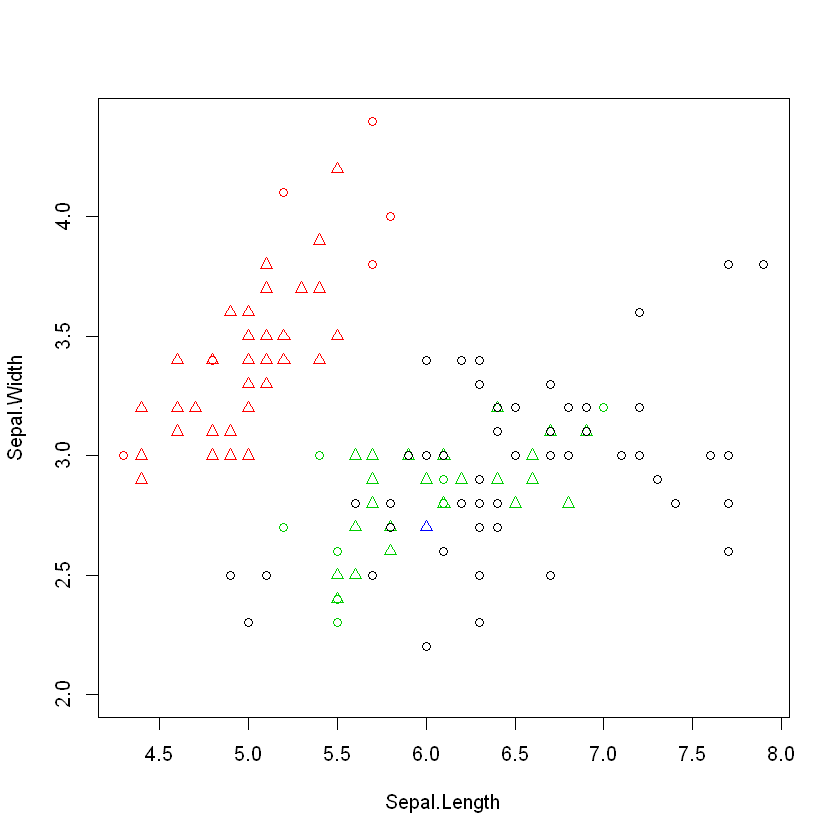

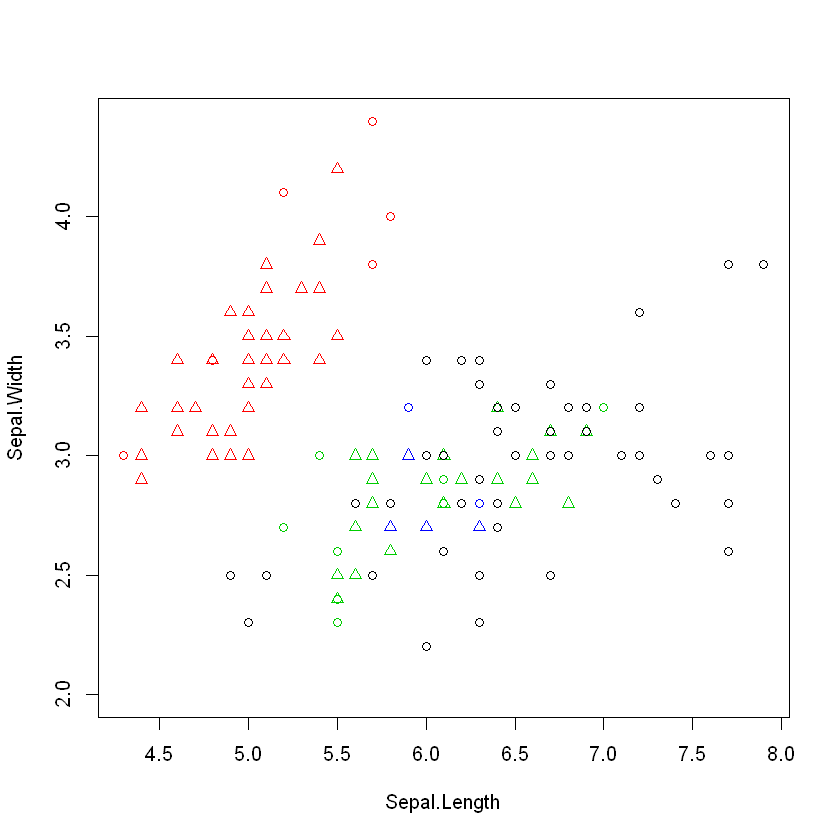

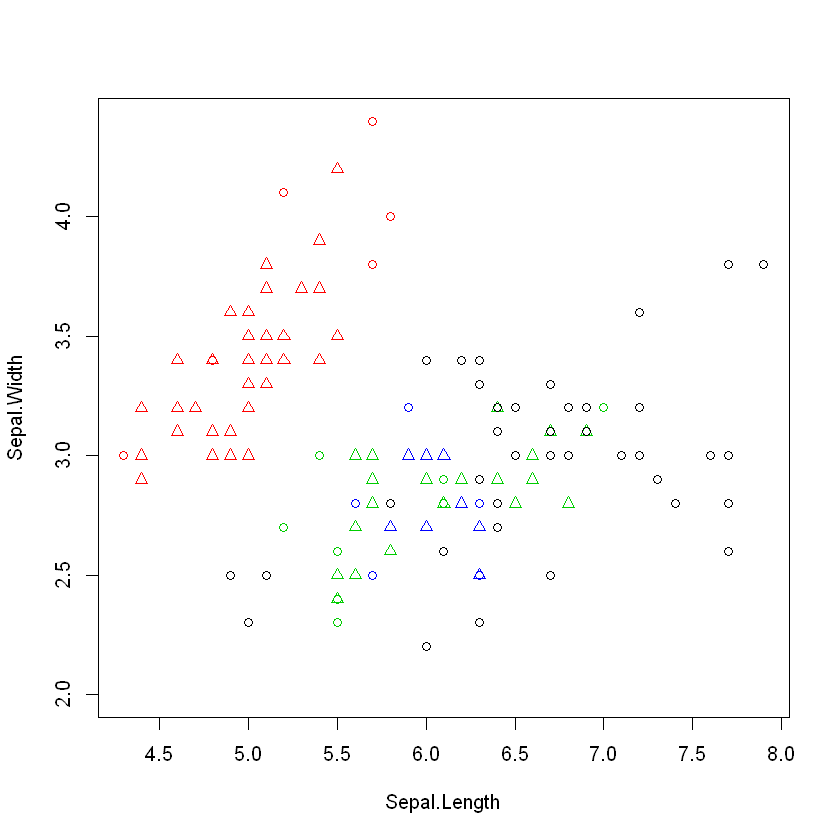

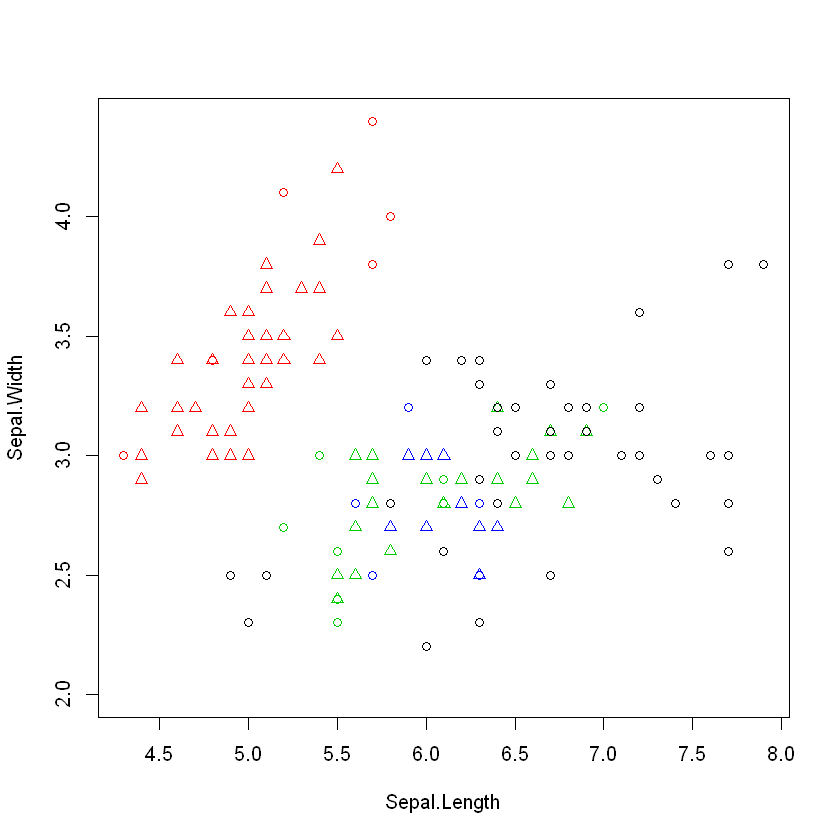

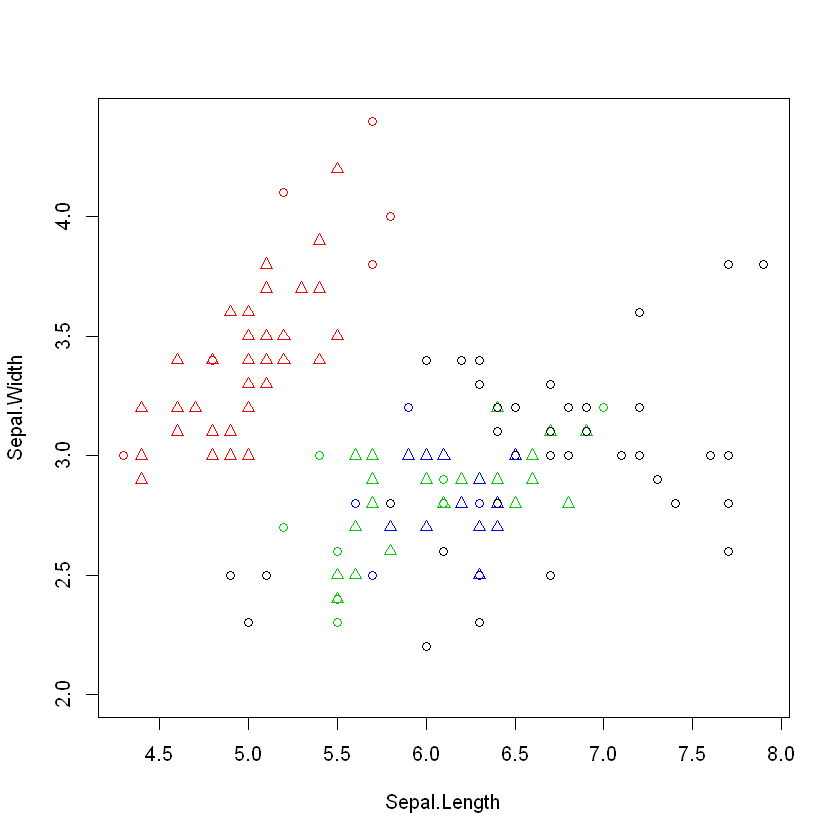

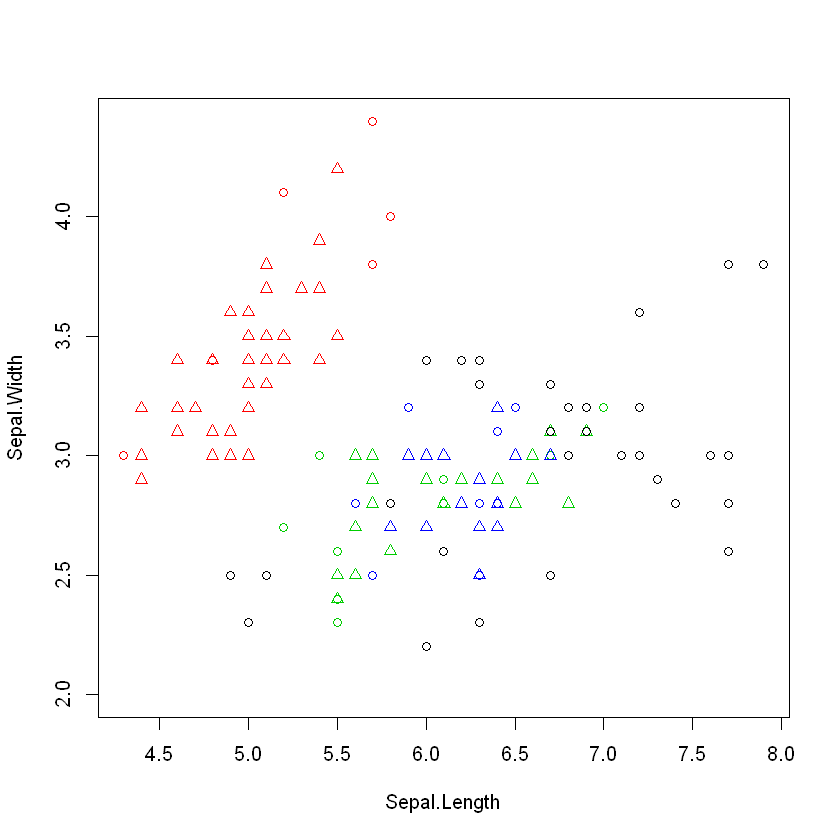

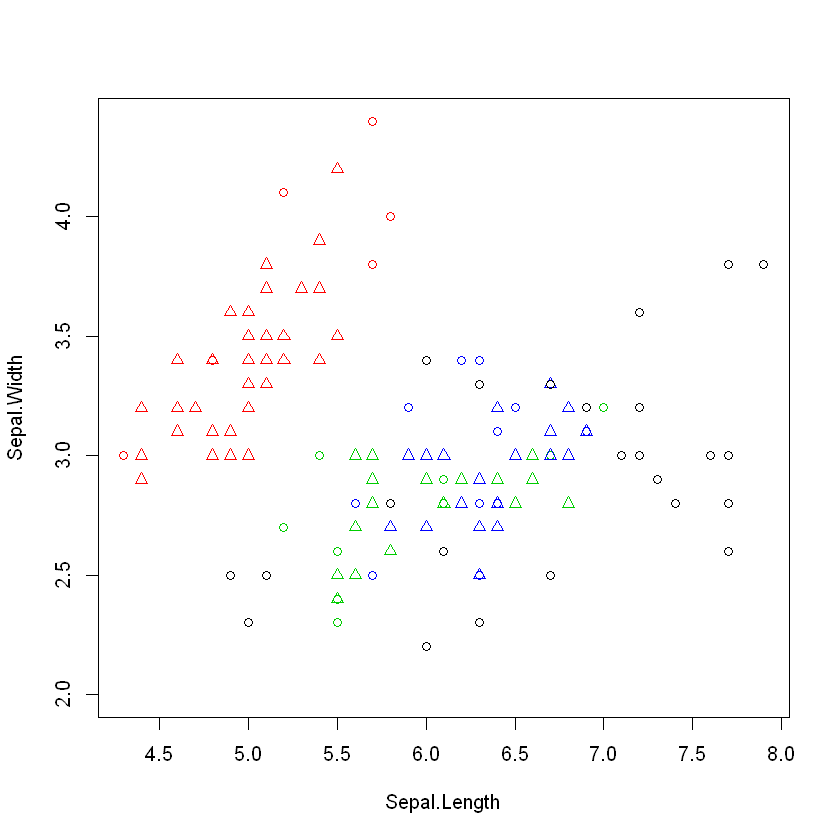

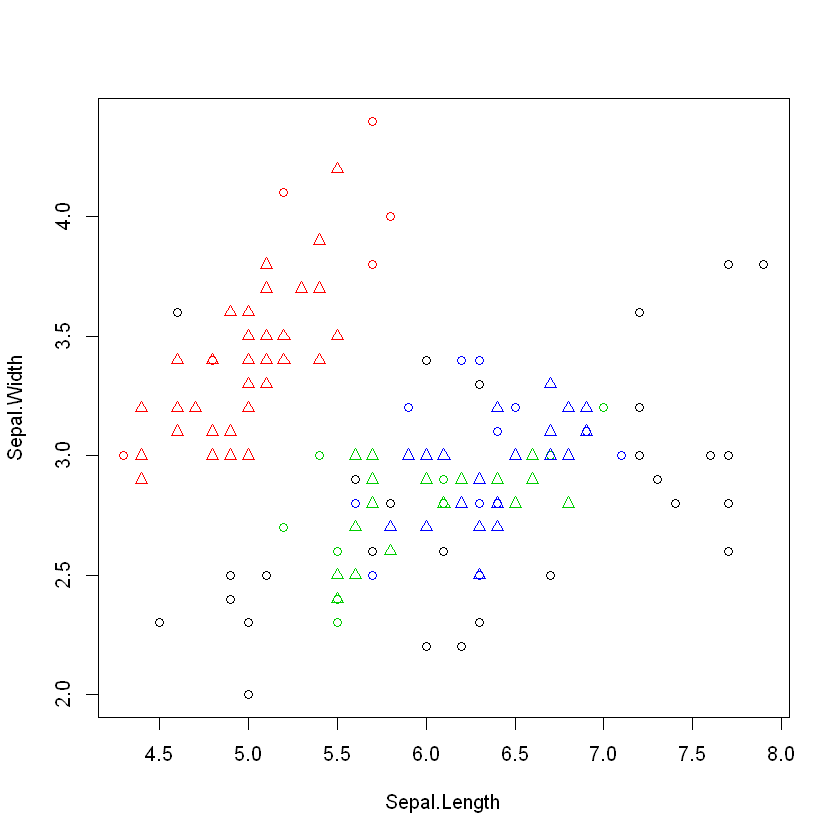

In [24]:
ds <- dbscan(newiris, eps = 0.42, MinPts = 5, showplot = 1)
#ds <- dbscan(newiris, eps = 0.42, MinPts = 5)
# eps and MinPts decided by domain experts

   
    setosa versicolor virginica
  0      2         10        17
  1     48          0         0
  2      0         37         0
  3      0          3        33


    setosa versicolor  virginica 
        50         50         50 

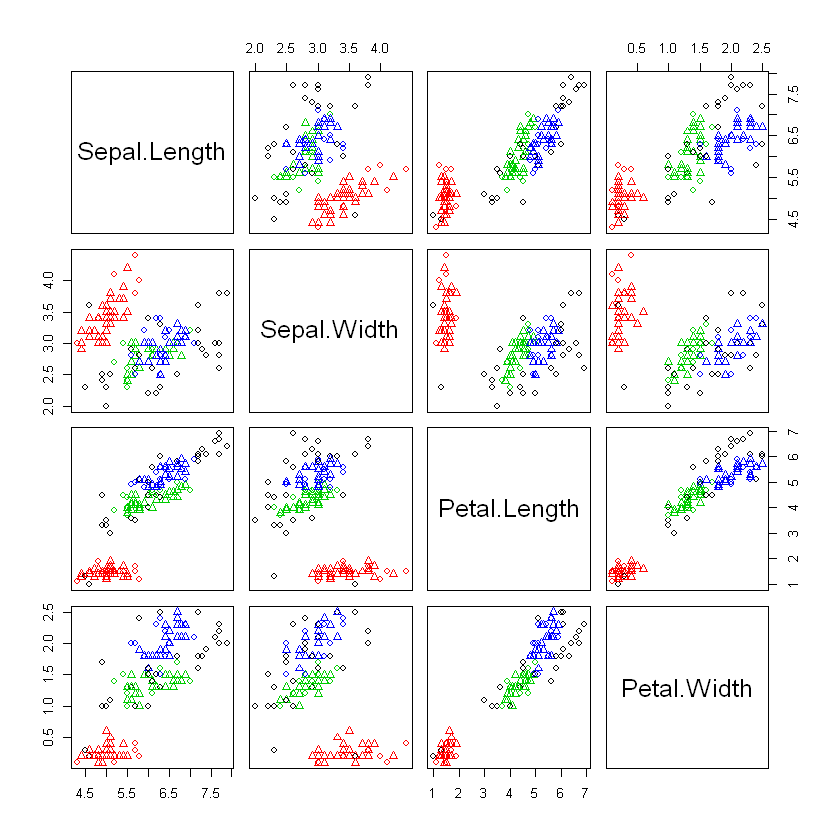

In [25]:
table(ds$cluster, iris$Species)
table(iris$Species)
plot(ds, newiris)
# if density is decreased no. of clusters will decrese

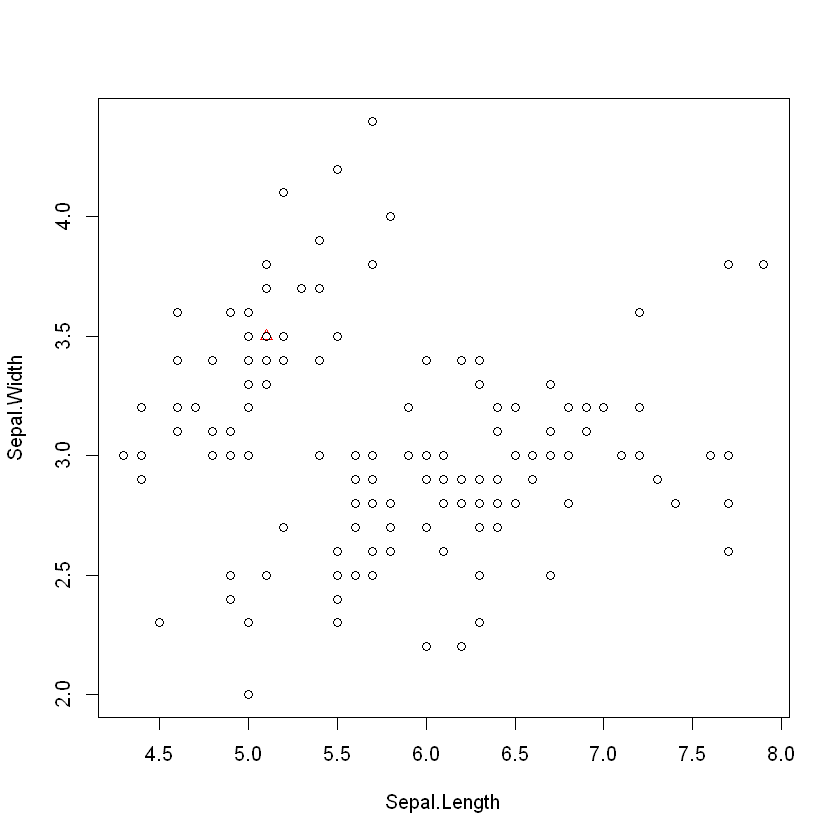

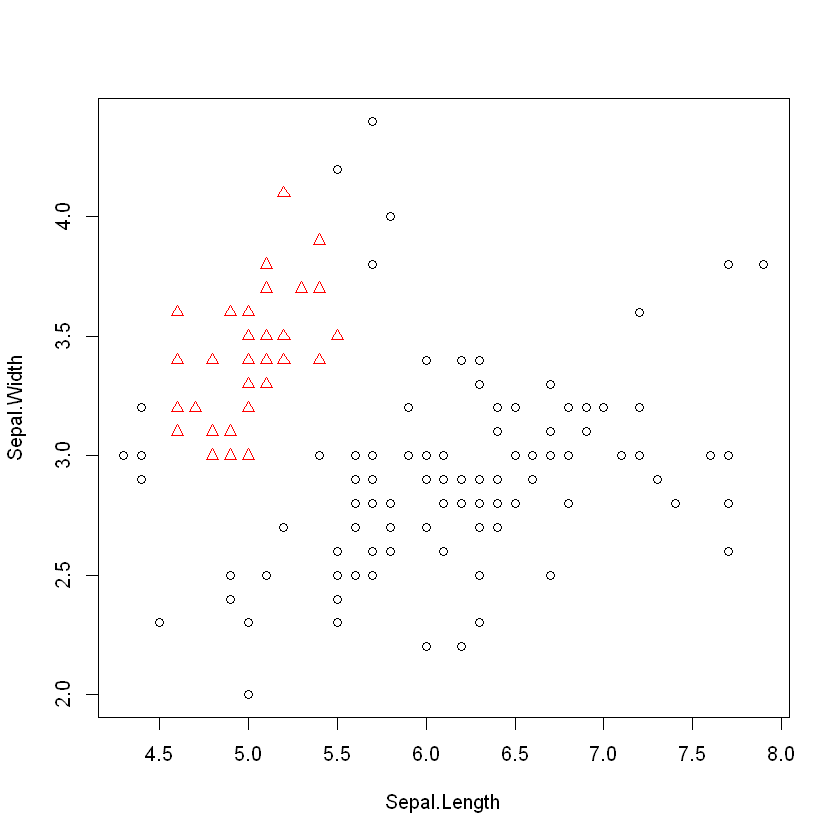

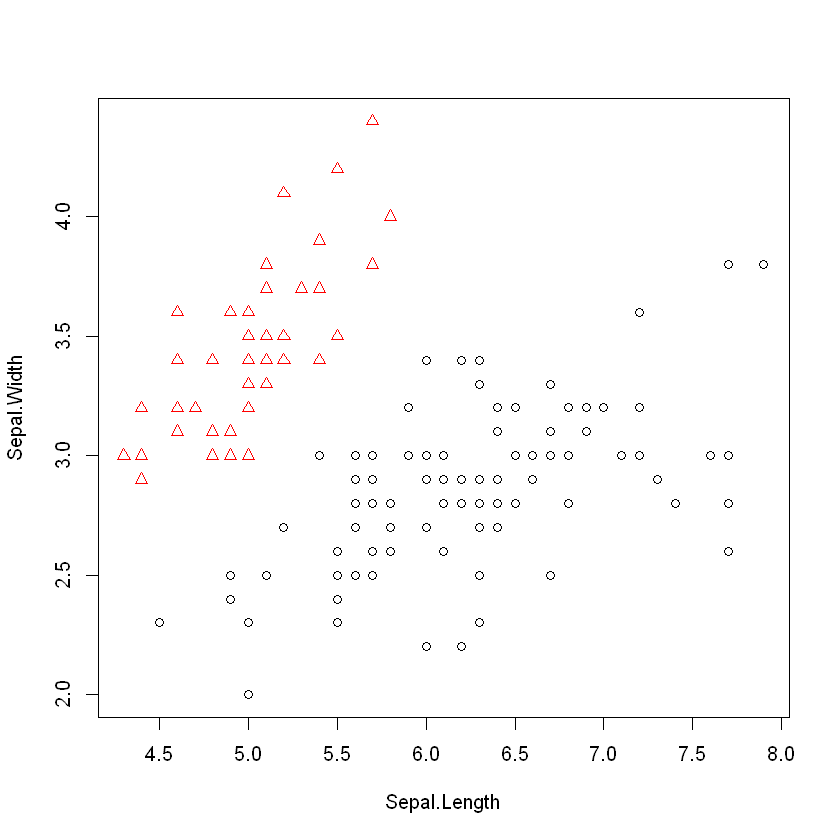

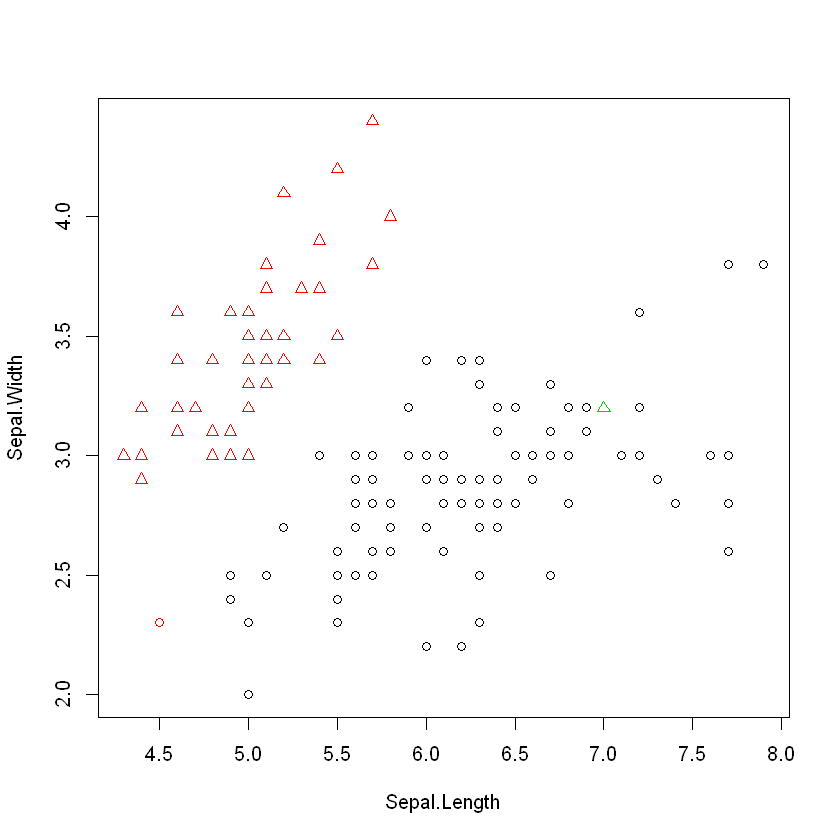

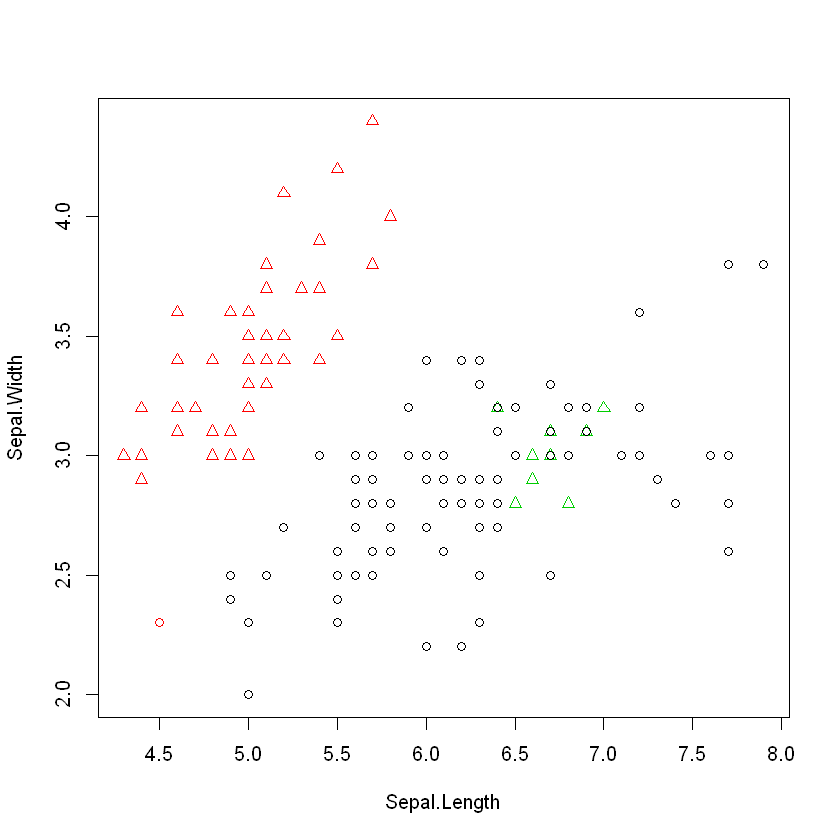

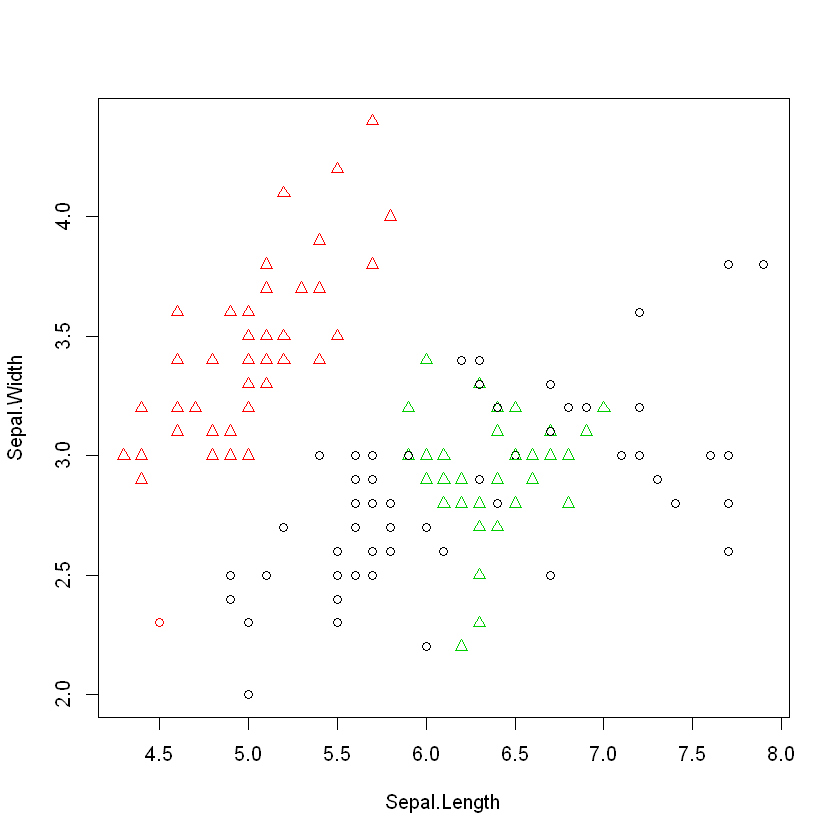

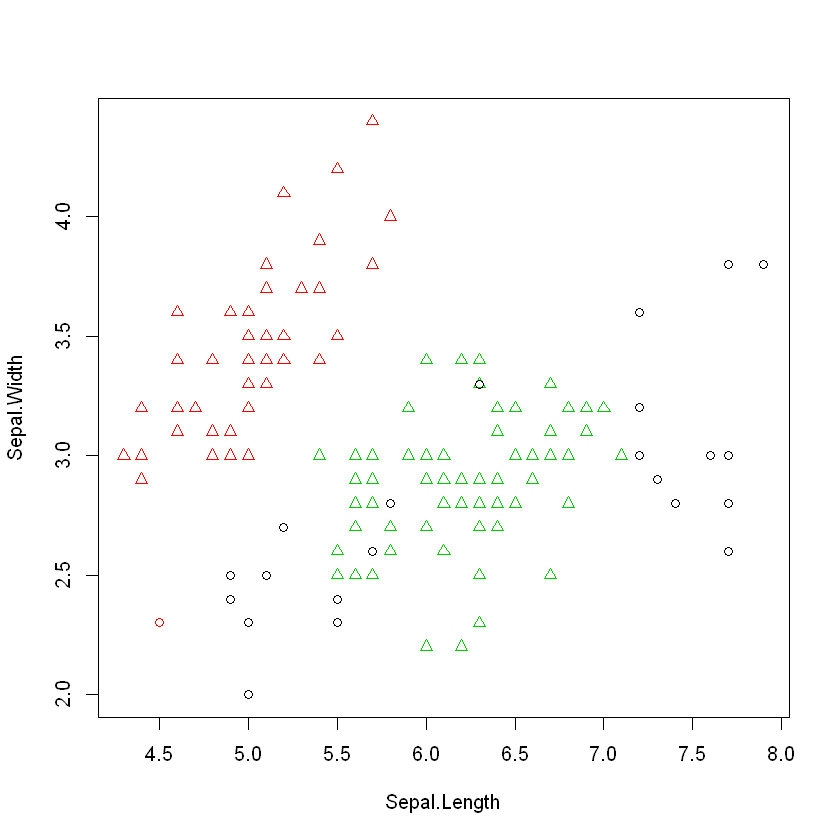

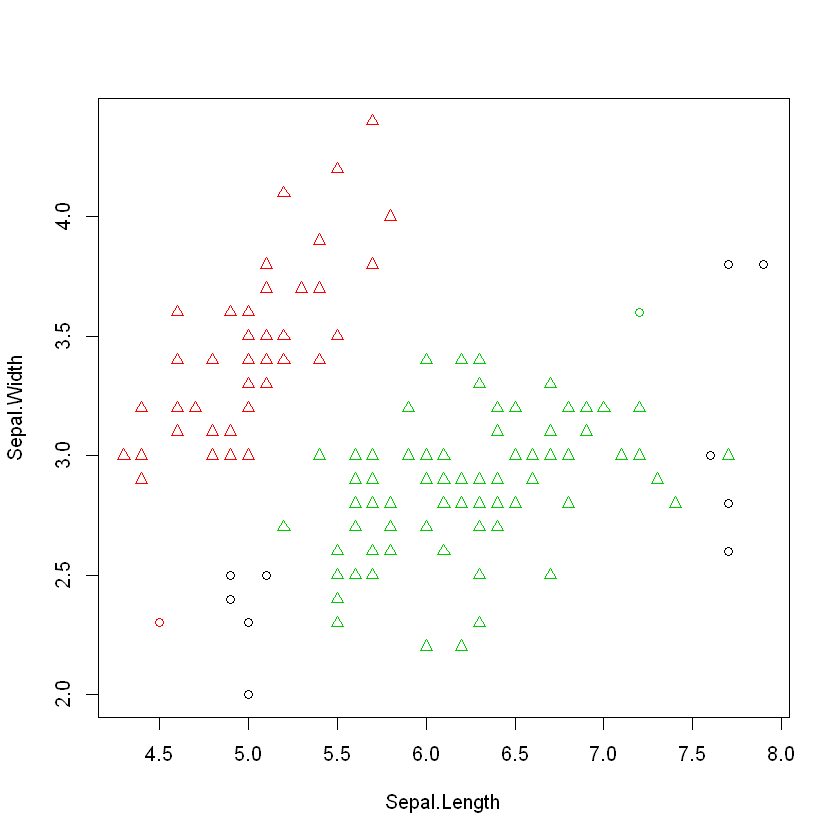

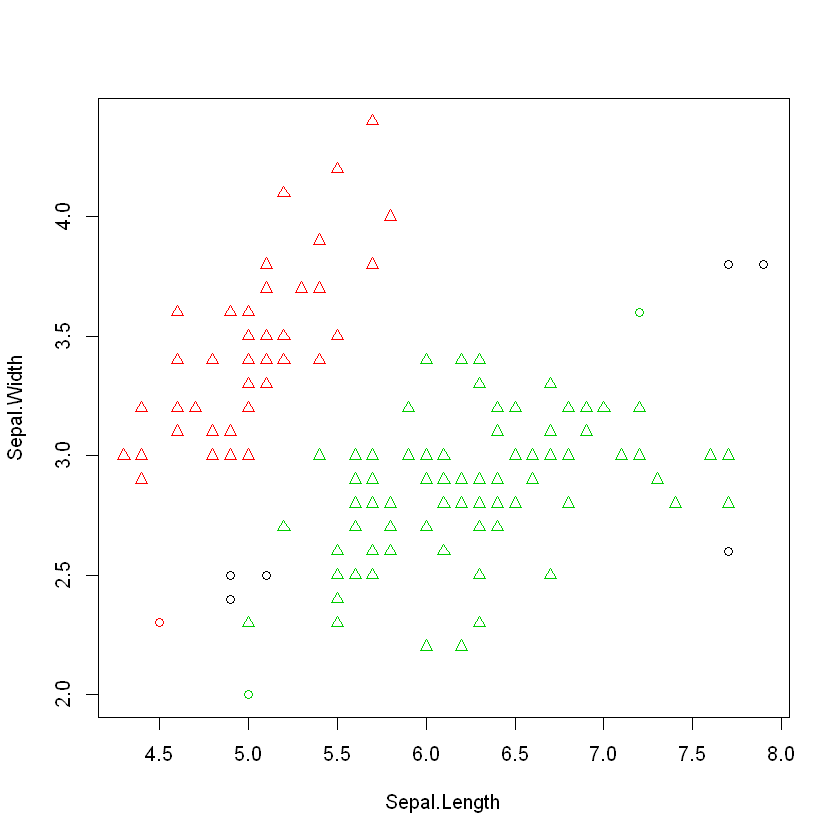

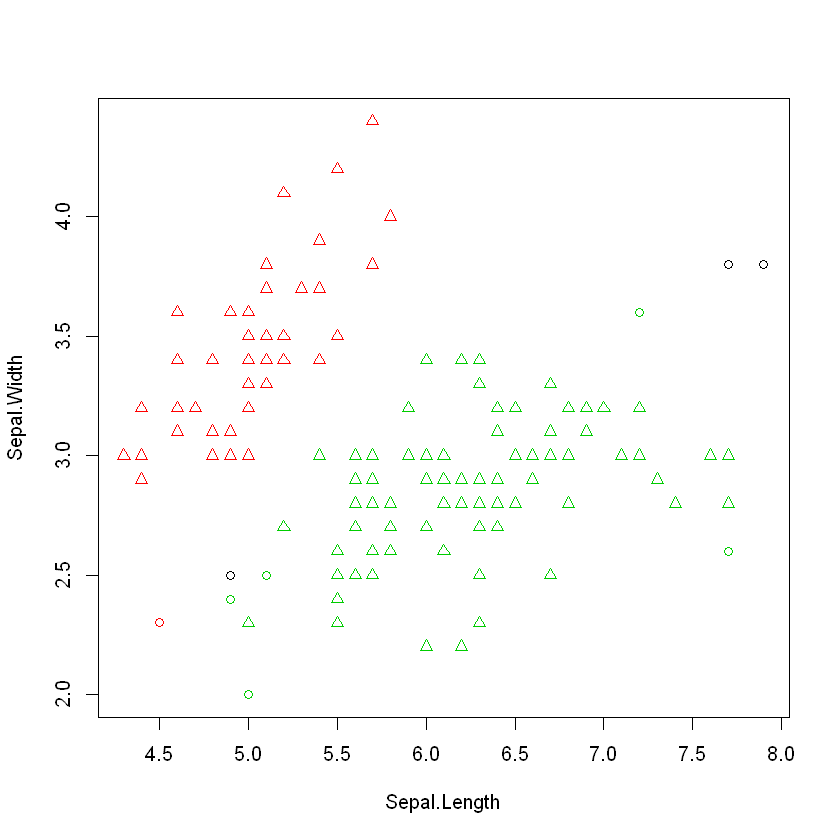

In [26]:
ds <- dbscan(newiris, eps = 0.7, MinPts = 5, showplot = 1)
# cluster is increasing rapidly as eps is higher

## Naive Bayes

In [27]:
library(e1071)

In [33]:
buys.computer = read.csv("buys.computer.csv")
buys.computer.test = read.csv("buys.computer.test.csv")

In [29]:
head(buys.computer)
str(buys.computer)

age,income,student,credit.rating,buy
Youth,high,no,fair,no
Youth,high,no,excellent,no
Middle_Aged,high,no,fair,yes
Senior,medium,no,fair,yes
Senior,low,yes,fair,yes
Senior,low,yes,excellent,no


'data.frame':	14 obs. of  5 variables:
 $ age          : Factor w/ 3 levels "Middle_Aged",..: 3 3 1 2 2 2 1 3 3 2 ...
 $ income       : Factor w/ 3 levels "high","low","medium": 1 1 1 3 2 2 2 3 2 3 ...
 $ student      : Factor w/ 2 levels "no","yes": 1 1 1 1 2 2 2 1 2 2 ...
 $ credit.rating: Factor w/ 2 levels "excellent","fair": 2 1 2 2 2 1 1 2 2 2 ...
 $ buy          : Factor w/ 2 levels "no","yes": 1 1 2 2 2 1 2 1 2 2 ...


In [30]:
NB = naiveBayes(buy~., data = buys.computer)
NB


Naive Bayes Classifier for Discrete Predictors

Call:
naiveBayes.default(x = X, y = Y, laplace = laplace)

A-priori probabilities:
Y
       no       yes 
0.3571429 0.6428571 

Conditional probabilities:
     age
Y     Middle_Aged    Senior     Youth
  no    0.0000000 0.4000000 0.6000000
  yes   0.4444444 0.3333333 0.2222222

     income
Y          high       low    medium
  no  0.4000000 0.2000000 0.4000000
  yes 0.2222222 0.3333333 0.4444444

     student
Y            no       yes
  no  0.8000000 0.2000000
  yes 0.3333333 0.6666667

     credit.rating
Y     excellent      fair
  no  0.6000000 0.4000000
  yes 0.3333333 0.6666667


In [31]:
# Predict Class
pred_class = predict(NB, newdata = buys.computer.test, type = "class")
pred_class

[1] yes
Levels: no yes

In [32]:
# Predict raw probabilities
pred_raw = predict(NB, newdata = buys.computer.test, type = "raw")
pred_raw

no,yes
0.1954948,0.8045052
